<a href="https://colab.research.google.com/github/meriembenchaaben/FewShotLearningEfficiency-replication-package/blob/main/scripts/SimilarityCheck_Normalised(Matrices).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import gensim
from gensim.models import Word2Vec
import os
import re
import regex
import warnings
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:



def getMode(df):
  return df['mode'].value_counts().idxmax()
def extractConcepts(logged):
  l=logged.split(',')

  cleaned_list = [''.join(filter(str.isalpha, element)) for element in l]

  return cleaned_list


In [ ]:



def merge_list_as_set_in_dict(dictionary, key, list_to_merge):
    set_to_merge = set(list_to_merge)  # Convert list to set
    if key in dictionary:
        if isinstance(dictionary[key], set):
            dictionary[key].update(set_to_merge)  # Merge the existing set with the converted set
        else:
            raise ValueError(f"The value for key '{key}' is not a set")
    else:
        dictionary[key] = set_to_merge  # Create a new key-value pair with the converted set



In [ ]:
def determine_task(group, mode):
    group = group.lower()
    mode = mode.lower()

    if group == 'group1':
        if mode == 'ontrigger':
            return 'hotel'
        elif mode == 'onrequest':
            return 'shopping'
        elif mode == 'assessatend':
            return 'banking'
        elif mode == 'no assistance':
            return 'banking'
    elif group == 'group2':
        if mode == 'ontrigger':
            return 'banking'
        elif mode == 'onrequest':
            return 'hotel'
        elif mode == 'assessatend':
            return 'shopping'
        elif mode == 'no assistance':
            return 'shopping'
    elif group == 'group3':
        if mode == 'ontrigger':
            return 'shopping'
        elif mode == 'onrequest':
            return 'banking'
        elif mode == 'assessatend':
            return 'hotel'
        elif mode == 'no assistance':
            return 'hotel'
    else:
        return None  # Handle other cases if needed




In [ ]:
import numpy as np

groups=['group1','group2','group3']

my_dict = {

}
#MTL
warnings.filterwarnings('ignore')

for group  in groups:


    drive_path="/content/gdrive/MyDrive/UserStudy/Results/logs/"+group+'/dataframes'
    for file_name in os.listdir(drive_path):

      #create dataframe

      if('noAssistance' not in file_name ):
        if('free' not in file_name.lower()):

          df=pd.read_csv(drive_path+'/'+file_name)

          # Apply the function to the last row of the first DataFrame
          last_row_df1 = df.iloc[-1]
          l = extractConcepts(last_row_df1['suggestedConcepts'])

          task=determine_task(group.strip().lower(),last_row_df1['mode'].strip().lower())
          merge_list_as_set_in_dict(my_dict,task , l)



In [ ]:
import numpy as np

groups=['group1','group2','group3']

all_mode_sequences = []
#Malaga

modes=['onRequest','automatic','atEnd']
warnings.filterwarnings('ignore')
for mode in modes:
  for group  in groups:

      drive_path="/content/gdrive/MyDrive/experiments Malaga/Results/dataframes_Logs/"+mode+ '/'+group
      for file_name in os.listdir(drive_path):
        #create dataframe
        if('noAssistance' not in file_name ):
          if('free' not in file_name.lower()):

            df=pd.read_csv(drive_path+'/'+file_name)

            # Apply the function to the last row of the first DataFrame
            last_row_df1 = df.iloc[-1]
            l = extractConcepts(last_row_df1['suggestedConcepts'])

            task=determine_task(group.strip().lower(),last_row_df1['mode'].strip().lower())

            merge_list_as_set_in_dict(my_dict,task , l)


In [ ]:
import csv
def write_dict_value_to_csv(dictionary):
    for key, value in dictionary.items():
        filename = '/content/gdrive/MyDrive/experiments Malaga/scripts/'+ f'{key}_values.csv'
        with open(filename, 'w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            for v in value:
                csv_writer.writerow([v])
# Write each key-value pair to a separate CSV file
write_dict_value_to_csv(my_dict)

In [ ]:
def createDict(df):
  _dict = {}
  for index, row in shoppingDf.iterrows():
    key = row[0]  # Use the value in the first column as the key
    values = [value for value in row[1:] if not pd.isnull(value)]
    _dict[key] = values
  return _dict

In [ ]:
#The manually crafted csv files to do the manual match
shoppingDf= pd.read_csv('/content/gdrive/MyDrive/experiments Malaga/scripts/shopping_values_normalized.csv')
shopping_dict=createDict(shoppingDf)
bankingDf= pd.read_csv('/content/gdrive/MyDrive/experiments Malaga/scripts/banking_values_normalized.csv')
banking_dict=createDict(bankingDf)
hotelDf= pd.read_csv('/content/gdrive/MyDrive/experiments Malaga/scripts/hotel_values_normalized.csv')
hotel_dict=createDict(hotelDf)
print(shopping_dict)

{'delivery': ['shipping', 'shippingdetails', 'shippers', 'Shipping', 'ShippingAddress', 'Delivery'], 'cashier': ['employees', 'employee', 'Employee', 'Staff', 'Worker', 'work'], 'department': ['Department'], 'review': ['Comment', 'comment', 'Complaint'], 'OrderItem': ['item', 'Orderitem', 'order', 'inventoryitem'], 'inventorycustomer': ['customer', 'user', 'Customer', 'consumer', 'shopper'], 'bill': ['billinginformation', 'BillingAddress', 'Billingaddress', 'Bill'], 'Re': ['re', 'Returns', 'returns'], 'phone': ['Phone', 'PhoneNumber', 'Contact', 'email', 'Email', 'phonenumber'], 'sale': ['Sales', 'Selling'], 'manager': ['Manager', 'storeowner'], 'Creditcard': ['credit', 'PaymentDetails', 'creditcard', 'CreditCard'], 'supplier': ['Seller'], 'Ware': ['warehouse', 'inventory', 'Inventory'], 'region': ['location', 'Location'], 'stock': ['StockItem', 'Stock'], 'offer': ['disc', 'offer', 'Offer', 'coupon'], 'retailer': ['stores', 'retail', 'store'], 'Shopping': ['shoppingcart', 'ShoppingCart

In [ ]:
import re
from itertools import combinations

# Function to preprocess suggestions by removing uppercase and punctuation
def preprocess_suggestions(suggestions):
    processed_suggestions = []
    for suggestion in suggestions:
        suggestion = suggestion.lower()  # Convert to lowercase
        suggestion = re.sub(r'[^\w\s]', '', suggestion)  # Remove punctuation
        processed_suggestions.append(suggestion)
    return processed_suggestions

def normalized_overlap_coefficient(set1, set2):
    intersection = len(set1.intersection(set2))
    min_size = min(len(set1), len(set2))
    return intersection / min_size if min_size != 0 else 0  # To handle division by zero

def calculate_average_normalized_overlap_coefficient(list_of_lists):
    # Preprocess each suggestion list
    processed_lists = [preprocess_suggestions(lst) for lst in list_of_lists]

    # Convert each processed suggestion list to sets for easy comparison
    sets = [set(lst) for lst in processed_lists]
    num_lists = len(sets)
    total_coefficient = 0

    # Calculate pairwise normalized Overlap Coefficient between all combinations of suggestion lists
    for pair in combinations(sets, 2):
        total_coefficient += normalized_overlap_coefficient(pair[0], pair[1])

    # Calculate average coefficient
    average_coefficient = total_coefficient / (num_lists * (num_lists - 1) / 2) if num_lists > 1 else 0
    return average_coefficient


In [ ]:
def getConceptsInCanvas(df):
  last_row = df.iloc[-1]

  # Accessing a specific column value from the last row
  column_value = last_row['conceptsInCanvas']
  new= column_value.split(',')
  return new
def determine_task_v2(group, mode):
    # Convert inputs to lowercase and remove spaces
    group = group.strip().lower()
    mode = mode.strip().lower()


    if group == 'group1':
        if mode == 'ontrigger':
            return 'hotel'
        elif mode == 'onrequest':
            return 'shopping'
        elif mode == 'assessatend':
            return 'banking'
        elif mode == 'noassistance':
            return 'banking'
        elif mode == 'automatic':
            return 'hotel'
    elif group == 'group2':
        if mode == 'ontrigger':
            return 'banking'
        elif mode == 'onrequest':
            return 'hotel'
        elif mode == 'assessatend':
            return 'shopping'
        elif mode == 'noassistance':
            return 'shopping'
        elif mode == 'automatic':
            return 'banking'
    elif group == 'group3':
        if mode == 'ontrigger':
            return 'shopping'
        elif mode == 'onrequest':
            return 'banking'
        elif mode == 'assessatend':
            return 'hotel'
        elif mode == 'noassistance':
            return 'hotel'
        elif mode == 'automatic':
            return 'shopping'
    else:
        return None  # Handle other cases if needed



def changeMode(mode):
  if  mode.lower().strip() == 'ontrigger':
    return 'automatic'
  elif mode.lower().strip() == 'atend':
    return 'assessatend'
  else:
    return mode.lower().strip()
groups=['group1','group2','group3']
d = []
resultDataframe =  pd.DataFrame( columns=['mode','AcceptanceRate Concepts'])
modes=['onRequest','automatic','atEnd']
warnings.filterwarnings('ignore')
for mode in modes:
  for group  in groups:

      drive_path="/content/gdrive/MyDrive/experiments Malaga/Results/dataframes_Logs/"+mode+ '/'+group
      for file_name in os.listdir(drive_path):
          print(file_name)
        #if('assessAtEnd' not in file_name):
          df=pd.read_csv(drive_path+'/'+file_name)
          task=determine_task_v2(group,changeMode(mode))
          listOfConcepts=getConceptsInCanvas(df)

            # Append the data to the list
          d.append([task,group, changeMode(mode),listOfConcepts])
# Create a DataFrame from the collected data
dfMalaga = pd.DataFrame(d, columns=['project','group','mode', 'concepts'])
print(dfMalaga.shape)

print('----------')

d = []

groups = ['group1', 'group2', 'group3']

for group in groups:

        drive_path = "/content/gdrive/MyDrive/UserStudy/Results/logs/"+ group +"/dataframes/"


        for file in os.listdir(drive_path):
          if "output" in file:
            if 'free' not in file.lower():


              df=pd.read_csv(drive_path+file)
              listOfConcepts=getConceptsInCanvas(df)
              mode=getMode(df)
              # pb on trigger is automatic ...
              task=determine_task_v2(group,mode)
              d.append([task,group, changeMode(mode),listOfConcepts])
# Create a DataFrame from the collected data
dfMtl = pd.DataFrame(d, columns=['project','group','mode', 'concepts'])
print(dfMtl.shape)


concat = pd.concat([dfMalaga,dfMtl])
concat

In [ ]:

print(concat.shape)
res=concat.groupby(['mode','project'])['concepts'].agg(list).reset_index()

res['len'] = res['concepts'].apply(len)
res


In [ ]:

def normalizeElemets(row):
  word = row['project']
  list_of_lists = row['concepts']
  if(word=='shopping'):
    dict_normalized= shopping_dict
  elif(word=='banking') :
    dict_normalized= banking_dict
  elif(word=='hotel'):
    dict_normalized= hotel_dict
  else:
    return
  print(list_of_lists)

  replaced_list_of_lists = [
      [value if value.strip().lower() in dict_normalized.keys() else next((key for key, values in dict_normalized.items() if value.strip().lower() in values), value.strip().lower()) for value in sublist]
      for sublist in list_of_lists
  ]
  print(replaced_list_of_lists)
  return  replaced_list_of_lists


res['normalizedConcepts']=res.apply(normalizeElemets, axis=1)


res['len'] = res['normalizedConcepts'].apply(len)
res

In [ ]:
 #Malaga
import warnings
warnings.simplefilter('ignore')
def getConceptsInCanvas(df):
  last_row = df.iloc[-1]

  # Accessing a specific column value from the last row
  column_value = last_row['conceptsInCanvas']
  new= column_value.split(',')
  return new


groups=['group1','group2','group3']
d = []
for group in groups:

        listOfConcepts=[]
        drive_path="/content/gdrive/MyDrive/experiments Malaga/Results/dataframes_Logs/noAssistance/before/"+group+'/'

        for file in os.listdir(drive_path):
            task=determine_task(group.strip().lower(),'no assistance'.lower())
            listOfConcepts=getConceptsInCanvas(pd.read_csv(drive_path+file))



            # Append the data to the list
            d.append([task,group, listOfConcepts])
# Create a DataFrame from the collected data
dfMalaga_noAssistance = pd.DataFrame(d, columns=['project','group', 'concepts'])
# Montreal
groups = ['group1', 'group2', 'group3']
values = []
data = []
d=[]
for group in groups:

        drive_path = "/content/gdrive/MyDrive/UserStudy/Results/logs/"+ group +"/dataframes/noAssistance/"
        for file in os.listdir(drive_path):
          if "output" in file:
            listOfConcepts=getConceptsInCanvas(pd.read_csv(drive_path+file))

            task=determine_task(group.strip().lower(),'no assistance'.lower())


            # Append the data to the list
            d.append([task, group,listOfConcepts])
# Create a DataFrame from the collected data
dfMTL_noAssistance =  pd.DataFrame(d, columns=['project','group', 'concepts'])
concat = pd.concat([dfMalaga_noAssistance,dfMTL_noAssistance])
res_noAssistance=concat.groupby(['project'])['concepts'].agg(list).reset_index()
res_noAssistance['mode']='no-assistance'
res_noAssistance['normalizedConcepts']=res_noAssistance.apply(normalizeElemets, axis=1)

print(dfMalaga_noAssistance.shape)
print(dfMTL_noAssistance.shape)
res_noAssistance

[['Customer', ' Account', ' Bank', ' User', ' Employee', ' Transaction', ' Payment'], ['Bank', ' Customer', ' CommunicationChannel', ' ATM', ' WebApp', ' PhoneApp', ' Transaction', ' Withdrawal', ' Deposit', ' Transfer', ' Employee', ' Person', ' Account', ' Checking'], ['Account', ' Channel', ' ATM', ' Transaction', ' Withdrawal', ' Deposit', ' Transfer', ' Employee', ' Loan'], ['Customer', ' Account', ' Bank', ' Operation', ' Withdrawal', ' Deposit', ' Transfer', ' SeniorAccount', ' Employee'], ['Customer', ' Transaction', ' ATM', ' Institution', ' Employee', ' Account', ' Personalinformation'], ['Customer', ' Bank', ' Account', ' employee'], ['Costumer', ' Account', ' Transfer', ' Transaction', ' ATM'], ['Customer', ' Transaction', ' TransactionType', ' ContactPoint', ' Account', ' BankingSystem', ' Employee', ' Address'], ['Employee', ' Customer', ' Transfer', ' ATM', ' System', ' Withdrawal', ' Deposit', ' Account'], ['Bank', ' Account', ' Savings', ' Chequing', ' Investment', ' C

,project,concepts,mode,normalizedConcepts
0,banking,"[[Customer, Account, Bank, User, Employee,...",no-assistance,"[[inventorycustomer, payment, payment, invento..."
1,hotel,"[[Hotel, Room, RoomReservation, Guest, Sin...",no-assistance,"[[hotel, room, roomreservation, guest, singler..."
2,shopping,"[[Customer, Product, Order, Shipment, Paym...",no-assistance,"[[inventorycustomer, Product, OrderItem, ship..."


In [ ]:
import re
from itertools import combinations

# Function to preprocess suggestions by removing uppercase and punctuation
def preprocess_suggestions(suggestions):
    processed_suggestions = []
    for suggestion in suggestions:
        suggestion = suggestion.lower()  # Convert to lowercase
        suggestion = re.sub(r'[^\w\s]', '', suggestion)  # Remove punctuation
        processed_suggestions.append(suggestion)
    return processed_suggestions

# Function to calculate Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0  # To handle division by zero

# Function to calculate average Jaccard similarity among suggestion lists
def calculate_average_jaccard_similarity(list_of_lists):
    # Preprocess each suggestion list
    processed_lists = [preprocess_suggestions(lst) for lst in list_of_lists]

    # Convert each processed suggestion list to sets for easy comparison
    sets = [set(lst) for lst in processed_lists]
    num_lists = len(sets)
    total_similarity = 0

    # Calculate pairwise Jaccard similarity between all combinations of suggestion lists
    for pair in combinations(sets, 2):
        total_similarity += jaccard_similarity(pair[0], pair[1])

    # Calculate average similarity
    average_similarity = total_similarity / (num_lists * (num_lists - 1) / 2) if num_lists > 1 else 0
    return average_similarity
def normalized_overlap_coefficient(set1, set2):
    intersection = len(set1.intersection(set2))
    min_size = min(len(set1), len(set2))
    return intersection / min_size if min_size != 0 else 0  # To handle division by zero

# Function to calculate average normalized Overlap Coefficient among suggestion lists
def calculate_average_normalized_overlap_coefficient(list_of_lists):
    # Preprocess each suggestion list
    processed_lists = [preprocess_suggestions(lst) for lst in list_of_lists]

    # Convert each processed suggestion list to sets for easy comparison
    sets = [set(lst) for lst in processed_lists]
    num_lists = len(sets)
    total_coefficient = 0

    # Calculate pairwise normalized Overlap Coefficient between all combinations of suggestion lists
    for pair in combinations(sets, 2):
        total_coefficient += normalized_overlap_coefficient(pair[0], pair[1])

    # Calculate average coefficient
    average_coefficient = total_coefficient / (num_lists * (num_lists - 1) / 2) if num_lists > 1 else 0
    return average_coefficient


def calculate_average_normalized_overlap_coefficient(list_of_lists):
    # Preprocess each suggestion list
    processed_lists = [preprocess_suggestions(lst) for lst in list_of_lists]

    # Convert each processed suggestion list to sets for easy comparison
    sets = [set(lst) for lst in processed_lists]
    num_lists = len(sets)
    total_coefficient = 0

    # Calculate pairwise normalized Overlap Coefficient between all combinations of suggestion lists
    for pair in combinations(sets, 2):
        total_coefficient += normalized_overlap_coefficient(pair[0], pair[1])

    # Calculate average coefficient
    average_coefficient = total_coefficient / (num_lists * (num_lists - 1) / 2) if num_lists > 1 else 0
    return average_coefficient


def sorensen_dice_coefficient(set1, set2):
    intersection = len(set1.intersection(set2))
    total_size = len(set1) + len(set2)
    return (2 * intersection) / total_size if total_size != 0 else 0  # To handle division by zero

# Function to calculate average Sørensen-Dice coefficient among suggestion lists
def calculate_average_sorensen_dice_coefficient(list_of_lists):
    # Preprocess each suggestion list
    processed_lists = [preprocess_suggestions(lst) for lst in list_of_lists]

    # Convert each processed suggestion list to sets for easy comparison
    sets = [set(lst) for lst in processed_lists]
    num_lists = len(sets)
    total_coefficient = 0

    # Calculate pairwise Sørensen-Dice coefficient between all combinations of suggestion lists
    for pair in combinations(sets, 2):
        total_coefficient += sorensen_dice_coefficient(pair[0], pair[1])

    # Calculate average coefficient
    average_coefficient = total_coefficient / (num_lists * (num_lists - 1) / 2) if num_lists > 1 else 0
    return average_coefficient

In [ ]:
# Function to calculate the standard deviation of the normalized Overlap Coefficient among suggestion lists
import math

def calculate_std_normalized_overlap_coefficient(list_of_lists):
    # Preprocess each suggestion list
    processed_lists = [preprocess_suggestions(lst) for lst in list_of_lists]

    # Convert each processed suggestion list to sets for easy comparison
    sets = [set(lst) for lst in processed_lists]
    num_lists = len(sets)
    coefficients = []

    # Calculate pairwise normalized Overlap Coefficient between all combinations of suggestion lists
    for pair in combinations(sets, 2):
        coefficients.append(normalized_overlap_coefficient(pair[0], pair[1]))

    # Calculate standard deviation

    if len(coefficients) > 0:
        average_coefficient = sum(coefficients) / len(coefficients)
        variance = sum((x - average_coefficient) ** 2 for x in coefficients) / len(coefficients)
        std_deviation = math.sqrt(variance)
    else:
        std_deviation = 0

    return std_deviation

In [ ]:

res_noAssistance['overlapCoeff'] = res_noAssistance['normalizedConcepts'].apply(calculate_average_normalized_overlap_coefficient)
#res_noAssistance['JackardSimilarity'] = res_noAssistance['normalizedConcepts'].apply(calculate_average_jaccard_similarity)
#res_noAssistance['diceCoeff'] = res_noAssistance['normalizedConcepts'].apply(calculate_average_sorensen_dice_coefficient)
#res_noAssistance['std'] = res_noAssistance['normalizedConcepts'].apply(calculate_std_normalized_overlap_coefficient)

res_noAssistance

,project,concepts,mode,normalizedConcepts,overlapCoeff
0,banking,"[[Customer, Account, Bank, User, Employee,...",no-assistance,"[[inventorycustomer, payment, payment, invento...",0.654423
1,hotel,"[[Hotel, Room, RoomReservation, Guest, Sin...",no-assistance,"[[hotel, room, roomreservation, guest, singler...",0.382218
2,shopping,"[[Customer, Product, Order, Shipment, Paym...",no-assistance,"[[inventorycustomer, Product, OrderItem, ship...",0.442751


In [ ]:
#res['std'] = res['normalizedConcepts'].apply(calculate_std_normalized_overlap_coefficient)

concat = pd.concat([res_noAssistance,res])

new_order = ['project','mode','concepts',	'normalizedConcepts']

concat = concat[new_order]

concat

,project,mode,concepts,normalizedConcepts
0,banking,no-assistance,"[[Customer, Account, Bank, User, Employee,...","[[inventorycustomer, payment, payment, invento..."
1,hotel,no-assistance,"[[Hotel, Room, RoomReservation, Guest, Sin...","[[hotel, room, roomreservation, guest, singler..."
2,shopping,no-assistance,"[[Customer, Product, Order, Shipment, Paym...","[[inventorycustomer, Product, OrderItem, ship..."
0,banking,assessatend,"[[Customer, Account, Bank, Operation, With...","[[inventorycustomer, payment, payment, operati..."
1,hotel,assessatend,"[[Hotel, Room, RoomReservation, Guest, Sin...","[[hotel, room, roomreservation, guest, singler..."
2,shopping,assessatend,"[[Customer, Product, Order, Shipment, Paym...","[[inventorycustomer, Product, OrderItem, ship..."
3,banking,automatic,"[[Customer, Bank, Account, Saving, Loan], ...","[[inventorycustomer, payment, payment, payment..."
4,hotel,automatic,"[[Hotel, Room, Customer, Reservation, Rest...","[[hotel, room, inventorycustomer, reservation,..."
5,shopping,automatic,"[[Product, Catalog, Order, Customer, Payme...","[[Product, catalog, OrderItem, inventorycustom..."
6,banking,onrequest,"[[Bank, Account, Transaction, Customer, Wi...","[[payment, payment, transaction, inventorycust..."


In [ ]:

sorted_df = concat.sort_values(by='mode', ascending=False)
sorted_df

sorted_df['overlapCoeff-Manual'] = sorted_df['normalizedConcepts'].apply(calculate_average_normalized_overlap_coefficient)

sorted_df
sorted_df['overlapCoeff--Exact'] = sorted_df['concepts'].apply(calculate_average_normalized_overlap_coefficient)
sorted_df.reset_index(drop=True)


,project,mode,concepts,normalizedConcepts,overlapCoeff-Manual,overlapCoeff--Exact
0,banking,onrequest,"[[Bank, Account, Transaction, Customer, Wi...","[[payment, payment, transaction, inventorycust...",0.499065,0.475996
1,hotel,onrequest,"[[Hotel, Room, Reservation, Guest, Payment...","[[hotel, room, reservation, guest, Payment, r...",0.545425,0.459917
2,shopping,onrequest,"[[Product, Manufacturer, Customer, Purchase...","[[Product, manufacturer, inventorycustomer, pu...",0.479868,0.413201
3,banking,no-assistance,"[[Customer, Account, Bank, User, Employee,...","[[inventorycustomer, payment, payment, invento...",0.654423,0.487760
4,hotel,no-assistance,"[[Hotel, Room, RoomReservation, Guest, Sin...","[[hotel, room, roomreservation, guest, singler...",0.382218,0.350366
5,shopping,no-assistance,"[[Customer, Product, Order, Shipment, Paym...","[[inventorycustomer, Product, OrderItem, ship...",0.442751,0.375661
6,banking,automatic,"[[Customer, Bank, Account, Saving, Loan], ...","[[inventorycustomer, payment, payment, payment...",0.656023,0.511173
7,hotel,automatic,"[[Hotel, Room, Customer, Reservation, Rest...","[[hotel, room, inventorycustomer, reservation,...",0.491296,0.394894
8,shopping,automatic,"[[Product, Catalog, Order, Customer, Payme...","[[Product, catalog, OrderItem, inventorycustom...",0.479559,0.421852
9,banking,assessatend,"[[Customer, Account, Bank, Operation, With...","[[inventorycustomer, payment, payment, operati...",0.666896,0.498272


In [ ]:
def getSimilarity(list_of_lists):
    # Preprocess each suggestion list
    processed_lists = [preprocess_suggestions(lst) for lst in list_of_lists]

    # Convert each processed suggestion list to sets for easy comparison
    sets = [set(lst) for lst in processed_lists]
    num_lists = len(sets)

    # Initialize a similarity matrix
    similarity_matrix = np.zeros((num_lists, num_lists))

    # Calculate pairwise normalized Overlap Coefficient between all combinations of suggestion lists
    for i in range(num_lists):
        for j in range(i, num_lists):
            if i == j:
                similarity_matrix[i][j] = 1.0  # The similarity with itself is 1
            else:
                coefficient = normalized_overlap_coefficient(sets[i], sets[j])
                similarity_matrix[i][j] = coefficient
                similarity_matrix[j][i] = coefficient  # Symmetric matrix

    return similarity_matrix


In [ ]:
def changeModeTitle(mode):
  if  mode.lower().strip() == 'assessatend':
    return 'At-End'
  elif mode.lower().strip() == 'automatic':
    return 'Automatic'
  elif mode.lower().strip() == 'onrequest':
    return 'On-Request'
  return mode

In [ ]:
def capitalize_first_letter(input_string):
    if len(input_string) > 0:
        return input_string[0].upper() + input_string[1:]
    else:
        return input_string  # return empty string if input is empty


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_plots = 12

# Number of rows and columns for the subplots grid
rows = 4  # Number of rows in the grid
cols = 3  # Number of columns in the grid

# Create a figure with a smaller size
fig, axes = plt.subplots(rows, cols, figsize=(12, 16))

# Flatten axes for easy iteration
axes = axes.flatten()

for idx, (ax, row) in enumerate(zip(axes, sorted_df.iterrows())):
    _, row = row
    list_of_lists = row['normalizedConcepts']

    # Calculate the similarity matrix (assuming getSimilarity and sorted_df are defined elsewhere)
    similarity_matrix = getSimilarity(list_of_lists)

    # Plot the similarity matrix with light blue colormap
    sns.heatmap(similarity_matrix, annot=True, cmap='Blues', ax=ax,
                cbar=False, square=True,
                xticklabels=[f'M_{i+1}' for i in range(len(list_of_lists))],
                yticklabels=[f'M_{i+1}' for i in range(len(list_of_lists))])

    # Assuming these functions are defined elsewhere
    mode = changeModeTitle(row['mode'])
    project = capitalize_first_letter(row['project'])
    ax.set_title(f'Task: {project} ---  Mode: {mode}')
    ax.tick_params(axis='both', which='both', length=0)  # Hide ticks

# Hide any unused axes if there are fewer than 12 plots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure as a single PNG file with higher DPI for clarity
plt.savefig('/content/gdrive/MyDrive/UserStudy/Results/SimilarityMatrix/all_similarity_matrices-full.png', dpi=300)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the number of plots
num_plots = 12

# Number of rows and columns for the subplots grid
rows = 4  # Number of rows in the grid
cols = 3  # Number of columns in the grid

# Create a figure with a smaller size
fig, axes = plt.subplots(rows, cols, figsize=(14, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create a diverging palette from red to blue
diverging_palette = sns.diverging_palette(250, 10, n=256)

# Initialize an axis for the color bar
cbar_ax = fig.add_axes([.91, .3, .03, .4])

# Loop through each subplot
for idx, (ax, row) in enumerate(zip(axes, sorted_df.iterrows())):
    _, row = row
    list_of_lists = row['normalizedConcepts']

    # Calculate the similarity matrix (assuming getSimilarity and sorted_df are defined elsewhere)
    similarity_matrix = getSimilarity(list_of_lists)

    # Plot the similarity matrix with the diverging palette
    sns.heatmap(similarity_matrix, annot=True, cmap=diverging_palette, ax=ax,
                cbar=(idx == 0), cbar_ax=None if idx else cbar_ax, square=True,
                xticklabels=[f'M_{i+1}' for i in range(len(list_of_lists))],
                yticklabels=[f'M_{i+1}' for i in range(len(list_of_lists))])

    # Assuming these functions are defined elsewhere
    mode = changeModeTitle(row['mode'])
    project = capitalize_first_letter(row['project'])
    ax.set_title(f'Task: {project} ---  Mode: {mode}')
    ax.tick_params(axis='both', which='both', length=0)  # Hide ticks

# Hide any unused axes if there are fewer than 12 plots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, .9, 1])  # Adjust layout to leave space for the color bar

# Save the combined figure as a single PNG file with higher DPI for clarity
plt.savefig('/content/gdrive/MyDrive/UserStudy/Results/SimilarityMatrix/all_similarity_matrices.png', dpi=300)

plt.show()


In [ ]:
order = [ "no-assistance","onrequest", "automatic", "assessatend"]

# Convert the 'mode' column to a categorical type with the specified order
sorted_df['mode'] = pd.Categorical(sorted_df['mode'], categories=order, ordered=True)
sorted_df = sorted_df.sort_values(by='mode')

sorted_df.reset_index(drop=True)
sorted_df

,project,mode,concepts,normalizedConcepts,std,overlapCoeff,overlapCoeff--Exact
0,banking,no-assistance,"[[Customer, Account, Bank, User, Employee,...","[[inventorycustomer, payment, payment, invento...",0.195270,0.654423,0.487760
1,hotel,no-assistance,"[[Hotel, Room, RoomReservation, Guest, Sin...","[[hotel, room, roomreservation, guest, singler...",0.196742,0.382218,0.350366
2,shopping,no-assistance,"[[Customer, Product, Order, Shipment, Paym...","[[inventorycustomer, Product, OrderItem, ship...",0.248846,0.442751,0.375661
6,banking,onrequest,"[[Bank, Account, Transaction, Customer, Wi...","[[payment, payment, transaction, inventorycust...",0.312454,0.499065,0.475996
7,hotel,onrequest,"[[Hotel, Room, Reservation, Guest, Payment...","[[hotel, room, reservation, guest, Payment, r...",0.164962,0.545425,0.459917
8,shopping,onrequest,"[[Product, Manufacturer, Customer, Purchase...","[[Product, manufacturer, inventorycustomer, pu...",0.174433,0.479868,0.413201
3,banking,automatic,"[[Customer, Bank, Account, Saving, Loan], ...","[[inventorycustomer, payment, payment, payment...",0.171593,0.656023,0.511173
4,hotel,automatic,"[[Hotel, Room, Customer, Reservation, Rest...","[[hotel, room, inventorycustomer, reservation,...",0.195770,0.491296,0.394894
5,shopping,automatic,"[[Product, Catalog, Order, Customer, Payme...","[[Product, catalog, OrderItem, inventorycustom...",0.170728,0.479559,0.421852
0,banking,assessatend,"[[Customer, Account, Bank, Operation, With...","[[inventorycustomer, payment, payment, operati...",0.208243,0.666896,0.498272


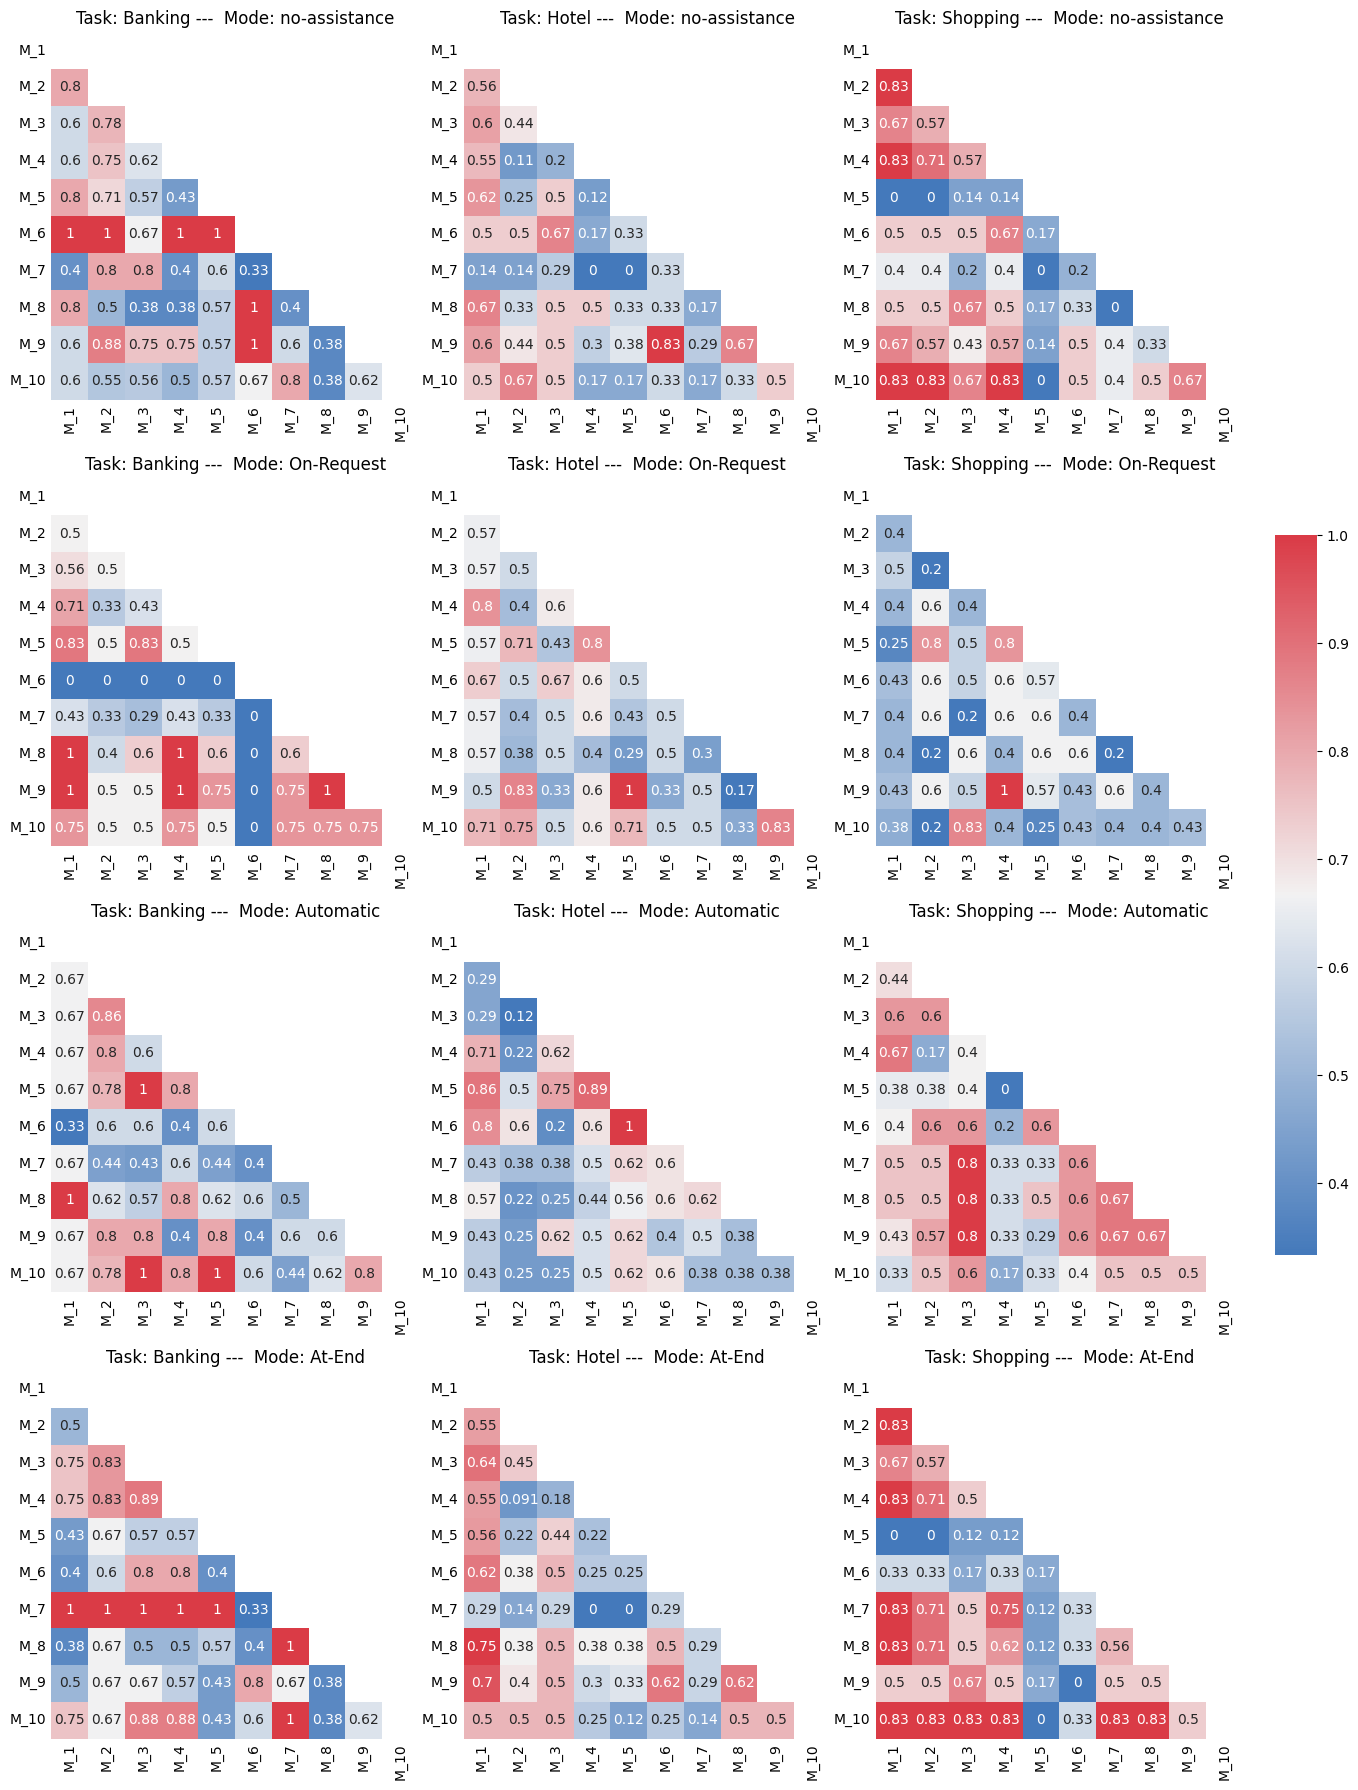

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the number of plots
num_plots = 12

# Number of rows and columns for the subplots grid
rows = 4  # Number of rows in the grid
cols = 3  # Number of columns in the grid

# Create a figure with a smaller size
fig, axes = plt.subplots(rows, cols, figsize=(14, 18))


# Flatten axes for easy iteration
axes = axes.flatten()

# Create a diverging palette from red to blue
diverging_palette = sns.diverging_palette(250, 10, n=256)

# Initialize an axis for the color bar
cbar_ax = fig.add_axes([.91, .3, .03, .4])

# Loop through each subplot
for idx, (ax, row) in enumerate(zip(axes, sorted_df.iterrows())):
    _, row = row
    list_of_lists = row['normalizedConcepts']

    # Calculate the similarity matrix (assuming getSimilarity and sorted_df are defined elsewhere)
    similarity_matrix = getSimilarity(list_of_lists)

    # Mask upper triangle to consider only lower triangle
    mask = np.triu(np.ones_like(similarity_matrix, dtype=bool))

    # Plot the masked similarity matrix with the diverging palette
    sns.heatmap(similarity_matrix, annot=True, cmap=diverging_palette, ax=ax,
                cbar=(idx == 0), cbar_ax=None if idx else cbar_ax, square=True,
                xticklabels=[f'M_{i+1}' for i in range(len(list_of_lists))],
                yticklabels=[f'M_{i+1}' for i in range(len(list_of_lists))],
                mask=mask)

    # Assuming these functions are defined elsewhere
    mode = changeModeTitle(row['mode'])
    project = capitalize_first_letter(row['project'])
    ax.set_title(f'Task: {project} ---  Mode: {mode}')
    ax.tick_params(axis='both', which='both', length=0)  # Hide ticks

# Hide any unused axes if there are fewer than 12 plots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, .9, 1])  # Adjust layout to leave space for the color bar

# Save the combined figure as a single PNG file with higher DPI for clarity
plt.savefig('/content/gdrive/MyDrive/UserStudy/Results/SimilarityMatrix/all_similarity_matrices.png', dpi=300)

plt.show()


In [ ]:
def changeIndice(mode):
  if  mode.lower().strip() == 'assessatend':
    return 'E'
  elif mode.lower().strip() == 'automatic':
    return 'A'
  elif mode.lower().strip() == 'onrequest':
    return 'O'

  elif mode.lower().strip() == 'no-assistance':
    return 'N'
  return mode

In [ ]:
order = [ "no-assistance","onrequest", "automatic", "assessatend"]

# Convert the 'mode' column to a categorical type with the specified order
sorted_df['mode'] = pd.Categorical(sorted_df['mode'], categories=order, ordered=True)
sorted_df = sorted_df.sort_values(by='mode')

sorted_df.reset_index(drop=True)
sorted_df

NameError: name 'sorted_df' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Define the number of plots
num_plots = 12

# Number of rows and columns for the subplots grid
rows = 4  # Number of rows in the grid
cols = 3  # Number of columns in the grid

# Create a figure with a smaller size
fig, axes = plt.subplots(rows, cols, figsize=(14, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create a diverging palette from red to blue
diverging_palette = sns.diverging_palette(250, 10, n=256)

# Initialize an axis for the color bar
cbar_ax = fig.add_axes([.91, .3, .03, .4])






# Loop through each subplot
for idx, (ax, row) in enumerate(zip(axes, sorted_df.iterrows())):
    _, row = row
    list_of_lists = row['normalizedConcepts']

    # Calculate the similarity matrix
    similarity_matrix = getSimilarity(list_of_lists)

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(similarity_matrix, dtype=bool))
    indice= changeIndice(row['mode'])

    # Plot the similarity matrix with the diverging palette
    sns.heatmap(similarity_matrix, annot=True, cmap=diverging_palette, ax=ax,
                cbar=(idx == 0), cbar_ax=None if idx else cbar_ax, square=True,
                xticklabels=[f'M{indice}_{i+1}' for i in range(len(list_of_lists))],
                yticklabels=[f'M{indice}_{i+1}' for i in range(len(list_of_lists))],
                 mask=mask, annot_kws={"size": 8})


    # Assuming these functions are defined elsewhere
    mode = changeModeTitle(row['mode'])
    project = capitalize_first_letter(row['project'])
    ax.set_title(f'Task: {project} ---  Mode: {mode}')
    ax.tick_params(axis='both', which='both', length=0)  # Hide ticks

# Hide any unused axes if there are fewer than 12 plots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, .9, 1])  # Adjust layout to leave space for the color bar

# Save the combined figure as a single PNG file with higher DPI for clarity
plt.savefig('/content/gdrive/MyDrive/UserStudy/Results/SimilarityMatrix/all_similarity_matrices-ordered.png', dpi=300)

plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define the number of plots
num_plots = 12

# Number of rows and columns for the subplots grid
rows = 4  # Number of rows in the grid
cols = 3  # Number of columns in the grid

# Create a figure with a smaller size
fig, axes = plt.subplots(rows, cols, figsize=(14, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create a diverging palette from red to blue, centered at 0.5
diverging_palette = sns.diverging_palette(250, 10, n=256, center='light')

# Initialize an axis for the color bar
cbar_ax = fig.add_axes([.91, .3, .03, .4])

# Loop through each subplot
for idx, (ax, row) in enumerate(zip(axes, sorted_df.iterrows())):
    _, row = row
    list_of_lists = row['normalizedConcepts']

    # Calculate the similarity matrix
    similarity_matrix = getSimilarity(list_of_lists)

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(similarity_matrix, dtype=bool))
    indice = changeIndice(row['mode'])

    # Define the range for the color bar
    vmin = 0.0
    vmax = 1.0

    # Plot the similarity matrix with the diverging palette
    sns.heatmap(similarity_matrix, annot=True, cmap=diverging_palette, ax=ax,
                cbar=(idx == 0), cbar_ax=None if idx else cbar_ax, square=True,
                xticklabels=[f'M{indice}_{i+1}' for i in range(len(list_of_lists))],
                yticklabels=[f'M{indice}_{i+1}' for i in range(len(list_of_lists))],
                mask=mask, annot_kws={"size": 8}, vmin=vmin, vmax=vmax, center=0.5)

    # Assuming these functions are defined elsewhere
    mode = changeModeTitle(row['mode'])
    project = capitalize_first_letter(row['project'])
    ax.set_title(f'Task: {project} ---  Mode: {mode}')
    ax.tick_params(axis='both', which='both', length=0)  # Hide ticks

# Hide any unused axes if there are fewer than 12 plots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, .9, 1])  # Adjust layout to leave space for the color bar

# Save the combined figure as a single PNG file with higher DPI for clarity
plt.savefig('/content/gdrive/MyDrive/UserStudy/Results/SimilarityMatrix/all_similarity_matrices-ordered.png', dpi=300)

plt.show()
